### Beer dataset , using python , pandas,matplotlib etc to get insights on the data and desired results.
#### Step 1 is to import all the neccesary packages.

In [90]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

#### Importing the file from my local system

In [192]:
import pandas as pd
df=pd.read_csv(r"D:\project\BeerDataScienceProject.csv",encoding = 'cp1252')
#df.head(10)

### Data Exploration , checking for shape,datatypes,Null values

In [193]:
df.shape

(528870, 13)

In [196]:
df.dtypes

beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time             int64
dtype: object

In [194]:
df.info()
# this function provides a fair overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
beer_ABV              508590 non-null float64
beer_beerId           528870 non-null int64
beer_brewerId         528870 non-null int64
beer_name             528870 non-null object
beer_style            528870 non-null object
review_appearance     528870 non-null float64
review_palette        528870 non-null float64
review_overall        528870 non-null float64
review_taste          528870 non-null float64
review_profileName    528755 non-null object
review_aroma          528870 non-null float64
review_text           528751 non-null object
review_time           528870 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [23]:
#df.head(5)

#### checking if the dataset have NULL Values,.

In [197]:
pd.isnull(df).any()

beer_ABV               True
beer_beerId           False
beer_brewerId         False
beer_name             False
beer_style            False
review_appearance     False
review_palette        False
review_overall        False
review_taste          False
review_profileName     True
review_aroma          False
review_text            True
review_time           False
dtype: bool

#### Exploring the "beer_ABV" column , The above code implied that beer_ABV has NUll values.

In [198]:
df['beer_ABV'].describe()
#df.shape

count    508590.000000
mean          7.017442
std           2.204460
min           0.010000
25%           5.300000
50%           6.500000
75%           8.500000
max          57.700000
Name: beer_ABV, dtype: float64

#### Either we can replace the NULL Values by 0 or by mean , i choose to replace these NUll Values by mean as it would make more sense in doing so.

In [199]:
df['beer_ABV'].fillna(value=df['beer_ABV'].mean(),inplace = True)

#### Question : 1 is to Rank top 3 Breweries which produce the strongest beers?
#### My approach to this question was 1. To explore the dataset 2. check and replace for null values if any 3.Grouping and aggregation to acheive the desired output.

In [201]:
grouped = df.groupby(['beer_brewerId'])['beer_ABV'].max().sort_values(ascending=False,na_position='first')[:5]
grouped

beer_brewerId
6513     57.7
35       27.0
2958     19.5
16866    19.5
18796    19.2
Name: beer_ABV, dtype: float64

#### So the solution is : 
#### BreweryId : 6513 (1st) 
#### BreweryId : 35 (2nd)
#### BreweryId : 2958 ( 3rd) and Also BreweryId : 16866(3rd)
##### To be sure of my result , i ran the below commented code , just to have a elaborate picture.

In [202]:
#f_beer=df.groupby(['beer_brewerId','beer_ABV']).count()
#f_beer.sort_values('beer_ABV',ascending=False)


#### Q2.Which year did beers enjoy the highest ratings? 
#### challenge here is that time is in unix epochs so we need to convert it into standard date format and then apply aggregate funstion to get the desired outcome.


In [206]:
df['unixtime']=pd.to_datetime(df['review_time'].astype(int), unit='s')

#### Extracting 'year' from the unixtime column so created.

In [207]:
df['year']=df['unixtime'].dt.year

In [208]:
df.head(3)
# just to check the columns

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,unixtime,year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009-02-16 20:57:03,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009-03-01 13:44:57,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009-03-01 14:10:04,2009


In [209]:
beer_hr = df.groupby(['year'])['review_overall'].agg({"max","count"}).round(2)

In [210]:
beer_hr

,max,count
year,,
1998,5.0,23
1999,4.5,25
2000,5.0,33
2001,5.0,602
2002,5.0,7581
2003,5.0,18187
2004,5.0,22905
2005,5.0,29433
2006,5.0,43083


#### The year when Beers enjoyed highest rating was 2011.

### Q3.Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

### Step1: selecting the dependent and independent columns and creating new dataframe.

In [211]:

rev_pattern = '[review_a+]+'
review_cols = df.columns.str.match(rev_pattern).tolist()
review_df = df.loc[:, review_cols]
review_df.drop([ 'review_profileName','review_text','review_time'], axis=1, inplace=True)
review_df.head(5)


,review_appearance,review_palette,review_overall,review_taste,review_aroma
0,2.5,2.0,1.5,1.5,1.5
1,3.0,2.5,3.0,3.0,3.0
2,3.0,2.5,3.0,3.0,3.0
3,3.5,3.0,3.0,2.5,3.0
4,4.0,4.5,4.0,4.0,4.5


### Plotting independent variables in comparison to the dependent variable using seaborn

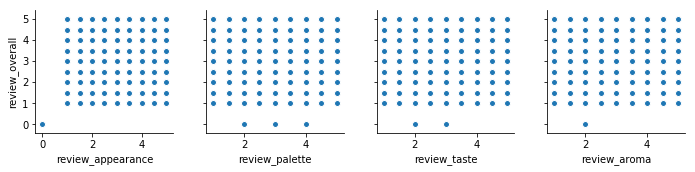

In [225]:
import seaborn as sns

sns.pairplot(data=review_df,
                  y_vars=['review_overall'],
                  x_vars=['review_appearance', 'review_palette', 'review_taste','review_aroma'])

### plotting gives a fair idea but not the exact winner in this case , review_taste and review_aroma are very closely related with review_overall according to the above plot , so trying different alternatives

In [230]:
corr = review_df.corr(method = 'pearson')

# plot the heatmap
#sns.heatmap(corr, 
        #xticklabels=corr.columns,
        #yticklabels=corr.columns)

#### plotting heatmap above , but to look at the exact numbers , we need to check the pearson coefficient values

In [231]:
corr

,review_appearance,review_palette,review_overall,review_taste,review_aroma
review_appearance,1.000000,0.547691,0.486687,0.554775,0.534244
review_palette,0.547691,1.000000,0.601971,0.604271,0.706156
review_overall,0.486687,0.601971,1.000000,0.692454,0.783002
review_taste,0.554775,0.604271,0.692454,1.000000,0.725273
review_aroma,0.534244,0.706156,0.783002,0.725273,1.000000


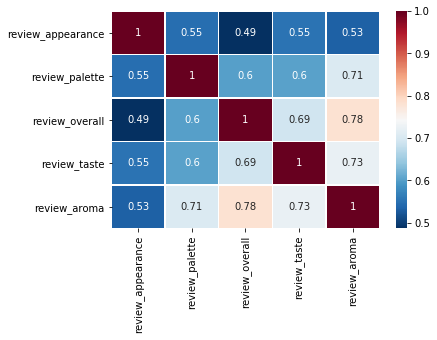

In [233]:
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#### Looking at the spearman rank correlation

In [235]:
scorr = review_df.corr(method = 'spearman')
scorr

,review_appearance,review_palette,review_overall,review_taste,review_aroma
review_appearance,1.000000,0.490674,0.445731,0.508758,0.487259
review_palette,0.490674,1.000000,0.546180,0.555853,0.661632
review_overall,0.445731,0.546180,1.000000,0.644555,0.722144
review_taste,0.508758,0.555853,0.644555,1.000000,0.680268
review_aroma,0.487259,0.661632,0.722144,0.680268,1.000000


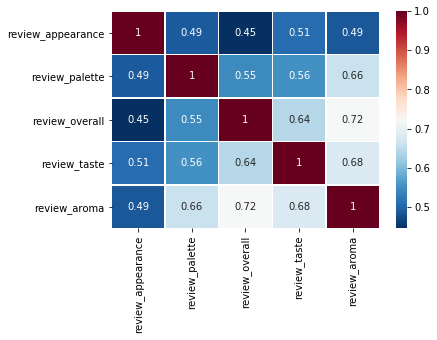

In [236]:
sns.heatmap(scorr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#### Applying the correlation gives review_aroma is the most important.

### Method2 : Though applying the correlation gives us the result . Need to cross verify with the OLS method

In [228]:
from statsmodels.api import OLS
x = review_df[['review_aroma', 'review_appearance','review_palette', 'review_taste']]
y = review_df[['review_overall']]
model = OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.093e+07
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:59:50   Log-Likelihood:            -2.9936e+05
No. Observations:              528870   AIC:                         5.987e+05
Df Residuals:                  528866   BIC:                         5.988e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
review_aroma          0.5591      0.00

#### Looking at the coef value , interpretation is confirming that these dependent variables having positive corelation with the independent variable . The second value of the coefficient denotes expected change in independent variable for 1 unit change in dependent variable.
#### Going by these two methods we can conclude that review_aroma is the most important.

### Q4 4.If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [237]:
from IPython.display import display,HTML
th_props = [
  ('font-size', '15px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#DF6002'),
  ('background-color', '#F6D08A'),
  ('border-style','solid')
  ]
td_props = [
  ('font-size', '12px'),
  ('font-weight', 'bold'),
#   ('background-color', '#F8E7B9'),
  ('text-align', 'center'),
  ('border-style','dotted')
  ]
styles = [
   dict(selector="tr:hover",props=[("background-color", "#ffff99")]),
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

#### 3 stratigies that i can think of is :1. people tend to have Beer whose ABV vary between 4 and 10 percent , but doing so around 20 percent of data loss , so keeping the value in the range of 4 and 12 percent.

In [238]:
# get a list of beers whose ABV% is between 4% to 12%
lower_abv,higher_abv = 4,12
cond1_beers = df.where(df['beer_ABV']>=lower_abv).where(df['beer_ABV']<=higher_abv)
print("1. Beers ABV% is between {}% to {}% (Fig. 2.1)".format(lower_abv,higher_abv))

1. Beers ABV% is between 4% to 12% (Fig. 2.1)


Text(0.5,1,'Figure 2.1\nHow ABV% is distributed in data?')

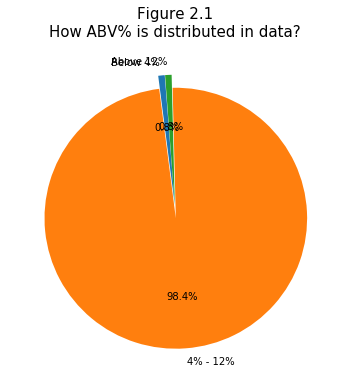

In [239]:
# plot
fig2 = plt.figure(figsize=(20, 6))
# Figure 2.1
ax2_1 = fig2.add_subplot(131)
ratios = [df.where(df['beer_ABV']<lower_abv)[['beer_brewerId','beer_name']].dropna().shape[0]/np.float(df.shape[0]),\
          cond1_beers.dropna().shape[0]/np.float(df.shape[0]),\
          df.where(df['beer_ABV']>higher_abv)[['beer_brewerId','beer_name']].dropna().shape[0]/np.float(df.shape[0])]
labels = ['Below 4%', '4% - 12%', 'Above 12%']
explode = [0, 0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -270 * ratios[1]
ax2_1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)
ax2_1.set_title('Figure 2.1\nHow ABV% is distributed in data?',fontsize=15)

#### review count is more than 90 percentile of the whole data, also mean of overall review greater than 70 percent .assumption is Best beer will have reviews on higher side also the rating mean will be definetly more than 90 percentile.
#### Also we can do hit and trails to come up with the optimum value as the p2_c and p2_m can be assigned different values.

In [243]:
# get a list of beers whose review count is higher than the data population average
p2_c,p2_m=90,70
aggregated2 = df.reset_index().groupby(['beer_brewerId','beer_name','beer_ABV'])['review_overall'].agg({'count','mean'}).round(2)
threshold2_c,threshold2_m = np.percentile(aggregated2['count'],p2_c),np.percentile(aggregated2['mean'],p2_m)
aggregated2 = aggregated2.where(aggregated2['count']>threshold2_c).dropna()
cond2_beers = aggregated2.where(aggregated2['mean']>threshold2_m ).dropna().reset_index()
print(aggregated2.head(5))
print(cond2_beers.head(5))


2. Popular beers whose number of reviews is 90th percentile and review overall score is 70th percentile (Fig. 2.2)
                                                           mean   count
beer_brewerId beer_name                          beer_ABV              
1             Gambrinus                          5.0       3.75    46.0
              Pilsner Urquell                    4.4       3.83  1257.0
3             20th Anniversary Pilsner           5.0       4.16    88.0
              25th Anniversary Vanilla Doubledog 7.0       3.53   101.0
              Abbey Ale                          8.0       3.62   189.0
   beer_brewerId                    beer_name  beer_ABV  mean  count
0              3     20th Anniversary Pilsner       5.0  4.16   88.0
1              5  Bert Grant's Perfect Porter       4.0  4.05  121.0
2             10                    Old Izaak       5.0  4.06   48.0
3             14                  Big Man Ale       6.8  4.14   35.0
4             14      Blunderbuss Ba

In [247]:
# get a list of reputational brewery that have above-average review counts (popularity) and its 
# average review scores is among the top 10% in the population 
p3 = 90
aggregated3 = df.groupby(['beer_brewerId'])['review_overall'].agg({"mean","count"}).round(2)
threshold3_c,threshold3_m = np.mean(aggregated3['count']),np.percentile(aggregated3['mean'],p3)
aggregated3 = aggregated3.where(aggregated3['count']>threshold3_c).dropna()
reputational_brewery = aggregated3.where(aggregated3['mean']>threshold3_m ).dropna().index
print("3. Most reputational brewery whose review overall score is {}th percentile and number of reviews is above average (Fig. 2.3)".format(p3))
print(aggregated3.head(5))
reputational_brewery

3. Most reputational brewery whose review overall score is 90th percentile and number of reviews is above average (Fig. 2.3)
               mean    count
beer_brewerId               
1              3.82   1357.0
3              3.56   5357.0
5              3.65    728.0
14             4.05   1202.0
22             4.03  13921.0


Int64Index([   14,    22,    37,    73,    76,    83,   113,   140,   176,
              207,   215,   264,   357,   388,   396,   590,   607,   610,
              681,   694,   911,  1177,  1199,  1923,  4663, 10485, 11977,
            14064, 16353, 17981, 20681, 24018, 27039],
           dtype='int64', name='beer_brewerId')

#### Using the above generated values to recommend the beer .
#### use the previously sorted list from condition 2 (cond2_beers) to select the first (highest in review overall score) 3 beers that satistify all conditions above

In [248]:
print("\n--------------------------------------------------------------------------------------------\n\nGenerating the list of best beers and selecting top 3 beers (based on review score):\n")
# use the previously sorted list from condition 2 (cond2_beers) to select the first (highest in review overall score) 3 beers that satistify all conditions above
beers = cond2_beers.reset_index().sort_values(by=['mean','count'],ascending=False)
recommenedBeers = []
recommenedBeersDF = pd.DataFrame(columns=['Beer','Brewery','Review Score (Overall)','Beer ABV%'])
x = len(recommenedBeers)
idx = 0
while x != 3 and idx <= beers.shape[0]-1:
    beer = beers.reset_index().loc[idx,'beer_name']
    brewery = beers.reset_index().loc[idx,'beer_brewerId']
    if brewery in reputational_brewery and beer in cond1_beers['beer_name'].unique():
        s = "{} ({})".format(beer,brewery)
        print("Best Beer No.{} : {}".format(x+1,s))
        recommenedBeers.append(s)
        recommenedBeersDF.loc[x,:]=np.array(beers.reset_index().loc[idx,['beer_name','beer_brewerId','mean','beer_ABV']])
        x = len(recommenedBeers)
        
    idx += 1
# Visualizing the output table

print("\nTable 2.1")
display(recommenedBeersDF.style.set_table_styles(styles).apply(lambda x : ['background: yellow' if x.name == 0 else '' for i in x],axis=1))


--------------------------------------------------------------------------------------------

Generating the list of best beers and selecting top 3 beers (based on review score):

Best Beer No.1 : Heady Topper (27039)
Best Beer No.2 : Citra DIPA (14064)
Best Beer No.3 : Cantillon Blåbær Lambik (388)

Table 2.1


,Beer,Brewery,Review Score (Overall),Beer ABV%
0,Heady Topper,27039,4.63,8
1,Citra DIPA,14064,4.63,8
2,Cantillon Blåbær Lambik,388,4.63,5
